<a href="https://colab.research.google.com/github/abhay-2108/Disease-Prediction/blob/main/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('disease.csv')

In [5]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [6]:
df.shape

(349, 10)

Data Cleaning

In [7]:
df.info

<bound method DataFrame.info of          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low            Normal         Positive  
1           Normal            Normal         Negative  
2           Normal            Normal         Negative  
3           Normal            Normal         Positive  
4           Normal            Normal         Positive  
..             ...               ...              ...  
344           High              High         Positive  
345           High              High         Positive  
346           High              High         Positive  
347           High              High         Positive  
348           High              High         Positive  

[349 rows x 10 columns]>

In [8]:
df.dtypes

,0
Disease,object
Fever,object
Cough,object
Fatigue,object
Difficulty Breathing,object
Age,int64
Gender,object
Blood Pressure,object
Cholesterol Level,object
Outcome Variable,object


In [9]:
df.isnull().count()

,0
Disease,349
Fever,349
Cough,349
Fatigue,349
Difficulty Breathing,349
Age,349
Gender,349
Blood Pressure,349
Cholesterol Level,349
Outcome Variable,349


In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,True
...,...
344,True
345,False
346,True
347,False


In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(300, 10)

In [13]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive


EDA

In [14]:
df.describe()

,Age
count,300.000000
mean,45.756667
std,12.596548
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [15]:
import seaborn as sns

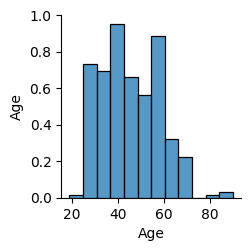

In [16]:
sns.pairplot(df)

In [19]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9459719e43a8bf28e1a2d92f9aec3fcb5ca0b96a449f54865d0f00ca5a61b273
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [20]:
import ydata_profiling as pp

In [21]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 49.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [23]:
X = df.drop(columns=['Disease'])
Y = df['Disease']

In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [25]:
categorical_features = ["Fever", "Cough", "Fatigue", "Difficulty Breathing", "Gender", "Blood Pressure", "Cholesterol Level"]
numerical_features = ["Age"]

In [26]:
# Using one-hot encoding categorical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(),categorical_features),
    ('num', 'passthrough', numerical_features)
])

In [27]:
# Building the pipeline with a Random Forest Classifier
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])

In [28]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Fever', 'Cough', 'Fatigue',
                                                   'Difficulty Breathing',
                                                   'Gender', 'Blood Pressure',
                                                   'Cholesterol Level']),
                                                 ('num', 'passthrough',
                                                  ['Age'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [29]:
y_pred = pipeline.predict(X_test)

In [30]:
report = classification_report(Y_test, y_pred, zero_division=0)

In [31]:
print(report, "\n")

                                              precision    recall  f1-score   support

                           Allergic Rhinitis       0.00      0.00      0.00         1
                                      Anemia       0.00      0.00      0.00         0
                           Anxiety Disorders       0.00      0.00      0.00         3
                                      Asthma       0.25      0.25      0.25         4
                             Atherosclerosis       0.00      0.00      0.00         0
                                  Bronchitis       0.00      0.00      0.00         2
                                   Cataracts       0.00      0.00      0.00         0
                                  Chickenpox       0.00      0.00      0.00         0
                      Chronic Kidney Disease       0.00      0.00      0.00         1
Chronic Obstructive Pulmonary Disease (COPD)       0.00      0.00      0.00         1
                                 Common Cold       0.

In [33]:
import pickle
model_path = 'model.pkl'
vectorizer_path = 'vectorizer.pkl'

with open(model_path, 'wb') as model_file:
    pickle.dump(pipeline, model_file)

# The preprocessor itself acts as the vectorizer here; saving the pipeline covers both
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(preprocessor, vectorizer_file)